## Image classification with Convolutional Neural Networks

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/dogscats/"
sz=224
arch=vgg16
bs=64

In [4]:
# Uncomment the below if you need to reset your precomputed activations
# !rm -rf {PATH}tmp

In [4]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/abhirammv/.torch/models/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:33<00:00, 16559094.85it/s]


100%|██████████| 32/32 [00:08<00:00,  3.57it/s]


In [6]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 281/360 [00:04<00:01, 63.82it/s, loss=0.525]


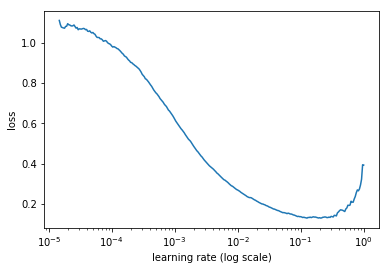

In [8]:
learn.sched.plot()

In [10]:
learn.fit(0.01, 3, cycle_len=1) #98.7% accuracy 

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.059141   0.036411   0.98584   
    1      0.055611   0.032115   0.989258                     
    2      0.049139   0.030579   0.987793                     



[0.030579003, 0.98779296875]

In [9]:
learn_2 = ConvLearner.pretrained(arch, data, precompute=True)

In [11]:
learn_2.fit(0.02, 3, cycle_len=1) #99% accuracy with 0.02 learning rate 

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.077299   0.033331   0.988281  
    1      0.05403    0.029422   0.988281                     
    2      0.053945   0.022074   0.992188                     



[0.022074085, 0.9921875]

In [12]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1) #applying transformations

In [13]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [14]:
learn.fit(0.02, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.056837   0.029919   0.989258  
    1      0.031997   0.019115   0.993652                     



[0.019115232, 0.99365234375]

In [15]:
learn.precompute=False

In [16]:
learn.fit(0.02, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.041868   0.022882   0.991699  



[0.022882264, 0.99169921875]

In [17]:
learn.unfreeze()

In [18]:
lr=np.array([1e-4,1e-3,0.02])

In [19]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.050422   0.027167   0.987305  



[0.027167344, 0.9873046875]

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2) 

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.044867   0.022295   0.991211  
    1      0.045551   0.019582   0.993164                     
    2      0.036481   0.019517   0.992676                     
    3      0.039866   0.018708   0.993164                     
    4      0.02528    0.015628   0.994141                     
    5      0.026937   0.017549   0.993652                     
    6      0.027461   0.015436   0.994629                     



[0.015435848, 0.99462890625]

First epoch is a cycle of cycle_len = 1. Next 2 epochs are considered one cycle because of cycle_mult. Next 4 epochs are considered the nect cycle because of cycle_mult. If cycle_len is 2, it considers 2 epochs to be one cycle. So it does to epochs in order to restart. 

In [21]:
learn.fit(lr, 3, cycle_len=3) #3 epochs of 3 cycles each 

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.026946   0.016947   0.994629  
    1      0.020107   0.017479   0.992676                     
    2      0.022065   0.01647    0.994141                     
    3      0.022376   0.017472   0.994629                     
    4      0.021234   0.016828   0.995117                     
    5      0.015671   0.016292   0.994141                     
    6      0.015908   0.021359   0.993164                     
    7      0.012554   0.016255   0.995117                     
    8      0.015026   0.016589   0.995117                     



[0.016588982, 0.9951171875]

In [22]:
learn.save('vgg16_all')

In [24]:
log_preds, y = learn.TTA()

In [27]:
probs = np.mean(np.exp(log_preds), axis=0) #mean because TTA

In [28]:
print(probs)

[[0.97118 0.02882]
 [1.      0.     ]
 [1.      0.     ]
 ...
 [0.00285 0.99715]
 [0.      1.     ]
 [0.00285 0.99715]]


In [29]:
accuracy_np(probs, y)

0.9945

In [32]:
preds = np.argmax(probs, axis=1) #traverses each column 

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[996   4]
 [  7 993]]


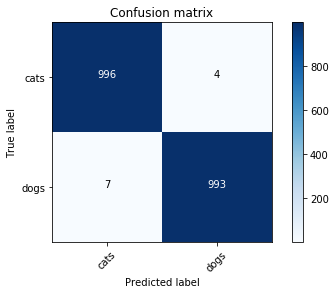

In [36]:
plot_confusion_matrix(cm, data.classes)